### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

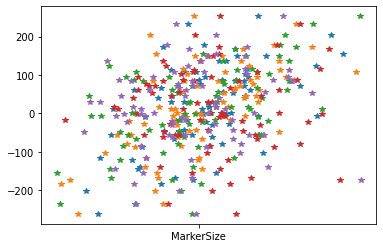

In [10]:
import matplotlib.pyplot as plt



plt.plot(X_train,y_train,'*','MarkerSize',10)

# Your code here

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [20]:
X

array([[ 1.58928579e+00, -2.43864781e-01, -9.53657453e-01,
        -6.10570973e-01,  1.59709397e+00],
       [ 1.91728485e+00, -5.80595172e-01, -1.94573993e-01,
        -6.80116241e-01, -1.09591600e+00],
       [ 4.86030067e-02, -3.74444917e-01,  2.09313488e-01,
         1.88646203e-01,  9.54698597e-01],
       [ 2.02240507e+00,  8.70841779e-01, -1.54292905e+00,
        -5.64875297e-01, -1.75210527e-01],
       [ 1.01355006e+00,  7.97023134e-01, -1.85293455e+00,
         4.59581779e-01, -9.17741045e-01],
       [ 2.96304983e-01, -7.23081483e-01, -2.43670919e+00,
        -1.18048659e-01, -9.61613938e-01],
       [-2.73972085e-01, -1.19688147e+00,  1.02608401e+00,
        -9.33043173e-01,  8.58741057e-01],
       [-2.55604366e-01,  4.24876682e-01, -1.56073345e-01,
         1.59447516e-01, -1.69217314e+00],
       [-3.16299786e-01,  5.33567293e-01,  2.82206663e-01,
        -2.29291305e+00,  5.74612568e-01],
       [-1.50226745e+00,  1.10246309e+00, -3.32110906e-01,
        -3.37095149e-01

In [23]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
        # Your code here 
        self.rate = learning_rate
        self.iters = n_iters
        self.weights = None
        self.bias = None


        # pass  # Uncomment this when you're done with this function


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
      n_samples = 100
      n_features = 5
      


      self.weights = np.zeros(n_features)
      self.bias = 0

      for _ in range(self.iters):
        # Gradient Descent code goes here
           y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
           dw = (1/n_samples)* np.dot(X.T, (y_predicted - y))
           db = (1/n_samples)* np.sum(y_predicted - y)

            # update parameters
           self.weights -= self.rate * dw
           self.bias -= self.rate * db

        # pass  # Uncomment this when you're done with this function
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
        # Code goes here
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

        # pass  # Uncomment this when you're done with this function

### Initializing, Training & Predictions

In [24]:
# Now, we make an object of our custom class.
regressor = LinearRegression(learning_rate=0.01, n_iters=1000) # You may pass the custom parameters or let the default values take it ahead

regressor. fit(X_train, y_train) # Call the fit method on the object to train  (pass appropriate part of dataset)


predictions = regressor.predict(X_test) # pass appropriate part of dataset

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [25]:
def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)
       # return the mean squared error
      #  pass  # Uncomment this when you're done with this function


def r2_score(y_true, y_pred):
  d1 = np.sum((y_true - y_pred)**2)
  m = np.mean(y_true)
  d2 = np.sum((y_true - m)**2)
  return 1 - (d1/d2)

  

   
      # return the r2 score
      # pass  # Uncomment this when you're done with this function
          

mse = mean_squared_error(y_test, predictions) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test, predictions) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 389.5184798939019
Accuracy: 0.9631753931003519
